<a href="https://colab.research.google.com/github/karanbhatt1/DeepLearningModels/blob/main/CitrusFruitClassificationUsingDeeplearninng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
from google.colab.patches import cv2_imshow
import os

In [ ]:
def loadAndShow(path):
  img = cv.imread(path)
  cv2_imshow(img)


In [ ]:
def changeChannel(path):
  img = cv.imread(path)
  img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
  cv2_imshow(img)

In [ ]:
path='/content/0_lb0.jpg'

def loadAndShow(path):
  img = cv.imread(path)
  if img is not None:
    cv2_imshow(img)
  else:
    print(f"Error: Image not found at {path}")

loadAndShow(path)

In [ ]:
def load_images_from_folder(dataset_path, target_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(dataset_path)

    for label, class_folder in enumerate(class_names):
        folder_path = os.path.join(dataset_path, class_folder)
        if not os.path.isdir(folder_path):
            continue

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv.imread(img_path)

            if img is not None:
                img = cv.resize(img, target_size)  # Resize all images
                images.append(img)
                labels.append(label)  # numeric label

    return np.array(images), np.array(labels), class_names


In [ ]:
train_path = '/content/drive/MyDrive/Datasets/CITRICOS_COL/train'

In [ ]:
train_images = load_images_from_folder(train_path)

In [ ]:
train_images[0].shape # Dataset contains 18669 images with dimensions 128*128

In [ ]:
tr_image , labels , class_name  =  train_images[0] , train_images[1], train_images[2]

In [ ]:
tr_image

In [88]:
class_name

['LIMON_CRIOLLO',
 'LIMON_MANDARINO',
 'LIMON_TAHITI',
 'MANDARINA_ISRAELI',
 'NARANJA_VALENCIA',
 'MANDARINA_PIELDESAPO',
 'TORONJA',
 'TANGELO']

In [97]:
# Dictionary mapping the labels with class_name:
label_to_class = {
    0: 'LIMON_CRIOLLO',
    1: 'LIMON_MANDARINO',
    2: 'LIMON_TAHITI',
    3: 'MANDARINA_ISRAELI',
    4: 'NARANJA_VALENCIA',
    5: 'MANDARINA_PIELDESAPO',
    6: 'TORONJA',
    7: 'TANGELO'
}

In [ ]:
# visualizing the dataset

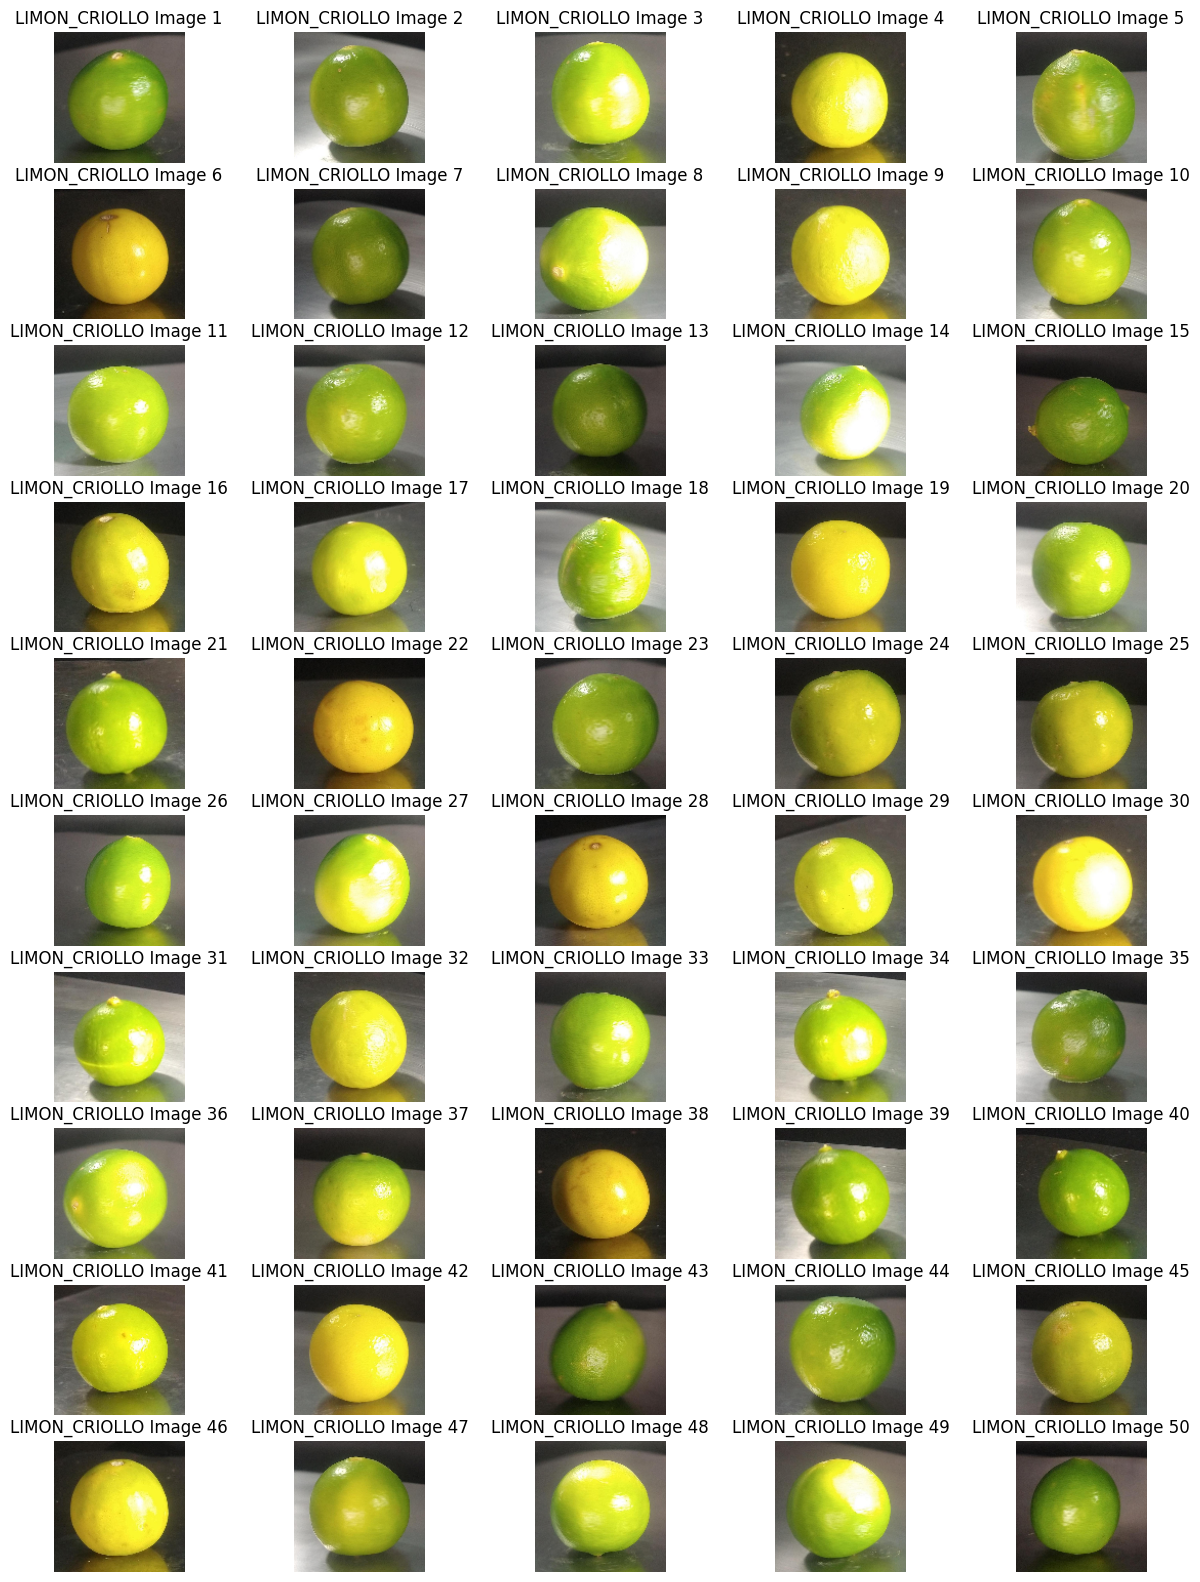

In [96]:
fig, axes = plt.subplots(10,5, figsize=(15, 20))
# Loop through the image paths and the axes to plot each image
for i, ax in enumerate(axes.flatten()):
    # Make sure we don't try to plot more images than we have
    if i < len(tr_image):
        # Get the image data directly from the array
        img = tr_image[i]
        # IMPORTANT: Convert image from BGR (OpenCV's default) to RGB (Matplotlib's default)
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Display the image on the current axis
        ax.imshow(img_rgb)

        # Set a title and turn off the axis labels for a cleaner look
        ax.set_title(f"{class_name[0]} Image {i+1}")
        ax.axis('off')

In [99]:
#Normalizing the dataset:
train_normalized = tr_image.astype('float32')/255.0

In [100]:
train_normalized

array([[[[0.14117648, 0.14901961, 0.14901961],
         [0.12941177, 0.13725491, 0.13725491],
         [0.12941177, 0.13725491, 0.13725491],
         ...,
         [0.1882353 , 0.2       , 0.19215687],
         [0.1764706 , 0.18431373, 0.18039216],
         [0.18039216, 0.1882353 , 0.1882353 ]],

        [[0.1254902 , 0.13333334, 0.13333334],
         [0.13333334, 0.14117648, 0.14117648],
         [0.12941177, 0.13725491, 0.13725491],
         ...,
         [0.1764706 , 0.18431373, 0.18431373],
         [0.16470589, 0.17254902, 0.17254902],
         [0.16470589, 0.17254902, 0.17254902]],

        [[0.11764706, 0.1254902 , 0.1254902 ],
         [0.13333334, 0.14117648, 0.14117648],
         [0.12941177, 0.13333334, 0.13333334],
         ...,
         [0.18431373, 0.19215687, 0.19607843],
         [0.18039216, 0.1882353 , 0.19215687],
         [0.1764706 , 0.18431373, 0.18431373]],

        ...,

        [[0.24313726, 0.27450982, 0.24705882],
         [0.23921569, 0.27058825, 0.24313726]

In [98]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.callbacks import EarlyStopping